# Лабораторная работа №2

## Логическая регрессия / Бейзлайн 

### Импорт

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, 
    classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


### Загрузка датасета для классификации

In [2]:
df_logreg = pd.read_csv('alzheimers.csv')

print("Alzheimer's Dataset shape:", df_logreg.shape)
df_logreg.head()

Alzheimer's Dataset shape: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Подготовка данных для логистической регрессии

In [3]:

X_logreg = df_logreg.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y_logreg = df_logreg['Diagnosis']

print(f"\nПризнаки для логистической регрессии: {X_logreg.shape}")
print(f"Целевая переменная для логистической регрессии: {y_logreg.shape}")


Признаки для логистической регрессии: (2149, 32)
Целевая переменная для логистической регрессии: (2149,)


### Разделение данных для логистической регрессии

In [4]:
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(
    X_logreg, y_logreg, test_size=0.2, random_state=42, stratify=y_logreg
)

print(f"Обучающая выборка: {X_train_logreg.shape}")
print(f"Тестовая выборка: {X_test_logreg.shape}")

Обучающая выборка: (1719, 32)
Тестовая выборка: (430, 32)


### Обучение модели логистической регрессии

In [5]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_logreg, y_train_logreg)

LogisticRegression(random_state=42)

### Оценка модели по метрикам

Accuracy: 0.8023
Precision: 0.7769
Recall: 0.6184
F1-Score: 0.6886
ROC-AUC: 0.8435


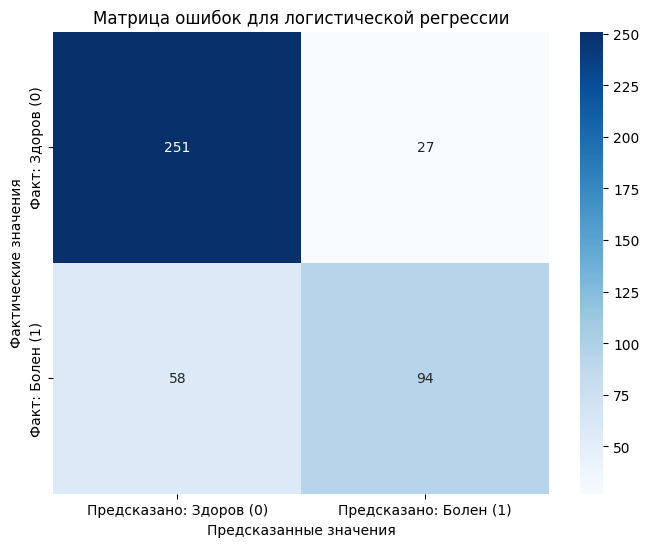


 Подробный отчет классификации:
              precision    recall  f1-score   support

  Здоров (0)       0.81      0.90      0.86       278
   Болен (1)       0.78      0.62      0.69       152

    accuracy                           0.80       430
   macro avg       0.79      0.76      0.77       430
weighted avg       0.80      0.80      0.80       430



In [7]:
y_pred_logreg = logreg_model.predict(X_test_logreg)
y_pred_proba_logreg = logreg_model.predict_proba(X_test_logreg)[:, 1]

accuracy = accuracy_score(y_test_logreg, y_pred_logreg)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test_logreg, y_pred_logreg)
recall = recall_score(y_test_logreg, y_pred_logreg)
f1 = f1_score(y_test_logreg, y_pred_logreg)

print(f"Precision: {precision:.4f}")

print(f"Recall: {recall:.4f}")

print(f"F1-Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test_logreg, y_pred_proba_logreg)
print(f"ROC-AUC: {roc_auc:.4f}")


cm = confusion_matrix(y_test_logreg, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Предсказано: Здоров (0)', 'Предсказано: Болен (1)'],
            yticklabels=['Факт: Здоров (0)', 'Факт: Болен (1)'])
plt.title('Матрица ошибок для логистической регрессии')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
plt.show()

print(f"\n Подробный отчет классификации:")
print(classification_report(y_test_logreg, y_pred_logreg, 
                           target_names=['Здоров (0)', 'Болен (1)']))


## Линейная регрессия / Бейзлайн

### Импорт

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Загрузка данных

In [9]:
df_linreg = pd.read_csv('student_performance.csv')
print("Student Dataset shape:", df_linreg.shape)
df_linreg.head()

Student Dataset shape: (6607, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Анализ целевой переменной

In [10]:
print(f"Переменная: Exam_Score")
print(f"Тип данных: {df_linreg['Exam_Score'].dtype}")
print(f"Диапазон: {df_linreg['Exam_Score'].min()} - {df_linreg['Exam_Score'].max()}")
print(f"Среднее: {df_linreg['Exam_Score'].mean():.2f}")
print(f"Стандартное отклонение: {df_linreg['Exam_Score'].std():.2f}")

Переменная: Exam_Score
Тип данных: int64
Диапазон: 55 - 101
Среднее: 67.24
Стандартное отклонение: 3.89


### Подготовка данных

In [11]:
df_students_prepared = df_linreg.copy()
missing_df = df_linreg.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()

print("Колонки с пропусками:", columns_with_missing)
for column in columns_with_missing:
    mode_value = df_students_prepared[column].mode()[0] 
    df_students_prepared[column].fillna(mode_value, inplace=True)
missing_after = df_students_prepared.isnull().sum().sum()
print(f"\nПропусков после заполнения: {missing_after}")
categorical_cols = df_students_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols:
    categorical_cols.remove('Exam_Score')

print(f"\nКатегориальные колонки для кодирования: {categorical_cols}")
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_reg = df_students_prepared.drop('Exam_Score', axis=1)
y_linreg = df_students_prepared['Exam_Score']

X_linreg = preprocessor.fit_transform(X_reg)
encoder = preprocessor.named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_cols)
numeric_features = [col for col in X_reg.columns if col not in categorical_cols]
all_features = list(encoded_cat_features) + numeric_features
print(f"\nРазмерность признаков после кодирования: {X_linreg.shape}")
print(f"Количество признаков: {len(all_features)}")

Колонки с пропусками: ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

Пропусков после заполнения: 0

Категориальные колонки для кодирования: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Размерность признаков после кодирования: (6607, 27)
Количество признаков: 27


### Разделение данных

In [12]:
X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(
    X_linreg, y_linreg, test_size=0.2, random_state=42
)

print(f"\nРазделение данных для линейной регрессии:")
print(f"Обучающая выборка: {X_train_linreg.shape}")
print(f"Тестовая выборка: {X_test_linreg.shape}")


Разделение данных для линейной регрессии:
Обучающая выборка: (5285, 27)
Тестовая выборка: (1322, 27)


### Обучение модели

In [13]:
linreg_model = LinearRegression()
linreg_model.fit(X_train_linreg, y_train_linreg)


LinearRegression()

### Оценка модели по метрикам

MAE: 0.4524
MSE: 3.2560
RMSE: 1.8044
R²: 0.7696


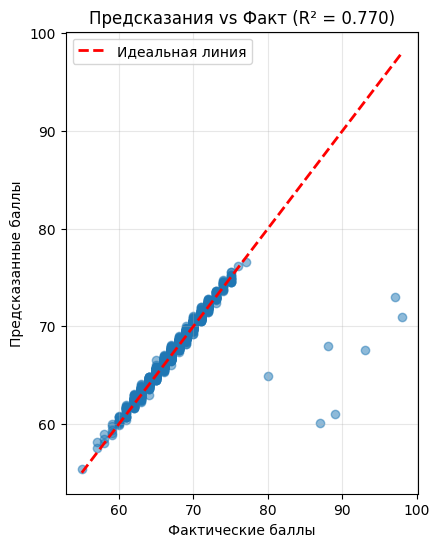

In [14]:
y_pred_linreg = linreg_model.predict(X_test_linreg)

mae = mean_absolute_error(y_test_linreg, y_pred_linreg)
print(f"MAE: {mae:.4f}")

mse = mean_squared_error(y_test_linreg, y_pred_linreg)
print(f"MSE: {mse:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

r2 = r2_score(y_test_linreg, y_pred_linreg)
print(f"R²: {r2:.4f}")


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_linreg, y_pred_linreg, alpha=0.5)
plt.plot([y_test_linreg.min(), y_test_linreg.max()], 
         [y_test_linreg.min(), y_test_linreg.max()], 
         'r--', lw=2, label='Идеальная линия')
plt.xlabel('Фактические баллы')
plt.ylabel('Предсказанные баллы')
plt.title(f'Предсказания vs Факт (R² = {r2:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)


##	Улучшение бейзлайна

## Логическая регрессия

### Формулировка гипотез для улучшения модели классификации

**Гипотеза 1: Масштабирование признаков улучшит качество логистической регрессии**
- **Что сделаем:** Применим StandardScaler для стандартизации числовых признаков.
- **Обоснование:**  Логистическая регрессия чувствительна к масштабу признаков, так как использует градиентные методы оптимизации. Масштабирование ускорит сходимость алгоритма и улучшит качество.

**Гипотеза 2:  Балансировка классов повысит recall модели**
- **Что сделаем:** Используем параметр class_weight='balanced'.
- **Обоснование:** В медицинских данных часто присутствует дисбаланс классов. Балансировка поможет модели лучше выявлять случаи болезни (повысит recall), что критически важно в медицинской диагностике.

**Гипотеза 3: Удаление мультиколлинеарных признаков улучшит стабильность модели**
- **Что сделаем:** Проанализируем корреляции между признаками и удалим сильно коррелированные признаки.
- **Обоснование:** Мультиколлинеарность может привести к нестабильным оценкам коэффициентов и переобучению модели.

**Гипотеза 4:  Подбор гиперпараметров через GridSearchCV улучшит производительность модели**
- **Что сделаем:** Оптимизируем параметры регуляризации (C), выбор решающего алгоритма (solver) и тип регуляризации (penalty).
- **Обоснование:**  Параметры по умолчанию не всегда оптимальны для конкретного набора данных. Систематический подбор поможет найти лучшую комбинацию.

**Гипотеза 5: Отбор признаков на основе важности повысит качество и интерпретируемость**
- **Что сделаем:** Используем метод SelectFromModel для отбора наиболее важных признаков.
- **Обоснование:** Удаление маловажных признаков может уменьшить переобучение, ускорить обучение и улучшить интерпретируемость модели.

### Проверка гипотез

In [15]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Модель"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if value is not None:
            print(f"{metric}: {value:.4f}")
    
    return metrics

def compare_results(baseline_metrics, new_metrics, metric_names):
    improvement = {}
    print("\nСравнение с baseline:")
    for metric in metric_names:
        if metric in baseline_metrics and metric in new_metrics:
            diff = new_metrics[metric] - baseline_metrics[metric]
            improvement[metric] = diff
            print(f"{metric}: {baseline_metrics[metric]:.4f} → {new_metrics[metric]:.4f} ({diff:+.4f})")
    return improvement

baseline_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

#### Проверка Гипотезы 1: Масштабирование признаков


Модель со StandardScaler:
Accuracy: 0.8163
Precision: 0.7417
Recall: 0.7368
F1-Score: 0.7393
ROC-AUC: 0.8854

Сравнение с baseline:
Accuracy: 0.8023 → 0.8163 (+0.0140)
Precision: 0.7769 → 0.7417 (-0.0351)
Recall: 0.6184 → 0.7368 (+0.1184)
F1-Score: 0.6886 → 0.7393 (+0.0506)
ROC-AUC: 0.8435 → 0.8854 (+0.0419)


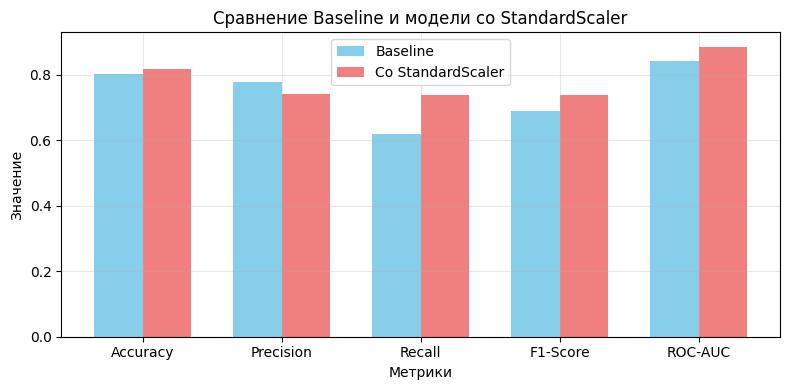


Вывод по Гипотезе 1: Масштабирование признаков улучшило производительность модели.
Наибольшее улучшение в метрике 'Recall': +0.1184


In [17]:
scaler_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

scaler_metrics = evaluate_model(scaler_pipeline, X_train_logreg, X_test_logreg, 
                                 y_train_logreg, y_test_logreg, "Модель со StandardScaler")

improvement_scaler = compare_results(baseline_metrics, scaler_metrics, 
                                     ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

plt.figure(figsize=(8, 4))
metrics_to_compare = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
baseline_values = [baseline_metrics[m] for m in metrics_to_compare]
scaler_values = [scaler_metrics[m] for m in metrics_to_compare]

x = np.arange(len(metrics_to_compare))
width = 0.35

plt.bar(x - width/2, baseline_values, width, label='Baseline', color='skyblue')
plt.bar(x + width/2, scaler_values, width, label='Со StandardScaler', color='lightcoral')

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение Baseline и модели со StandardScaler')
plt.xticks(x, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nВывод по Гипотезе 1: Масштабирование признаков " + 
      ("улучшило" if any(v > 0 for v in improvement_scaler.values()) else "не улучшило") + 
      " производительность модели.")
if any(v > 0 for v in improvement_scaler.values()):
    best_improvement = max(improvement_scaler.items(), key=lambda x: x[1])
    print(f"Наибольшее улучшение в метрике '{best_improvement[0]}': +{best_improvement[1]:.4f}")

### Проверка Гипотезы 2: Балансировка классов

Распределение классов в обучающей выборке:
Класс 0 (Здоров): 1111 (64.6%)
Класс 1 (Болен): 608 (35.4%)

Модель с балансировкой классов:
Accuracy: 0.7884
Precision: 0.6614
Recall: 0.8224
F1-Score: 0.7331
ROC-AUC: 0.8729

Сравнение с baseline:
Accuracy: 0.8023 → 0.7884 (-0.0140)
Precision: 0.7769 → 0.6614 (-0.1155)
Recall: 0.6184 → 0.8224 (+0.2039)
F1-Score: 0.6886 → 0.7331 (+0.0445)
ROC-AUC: 0.8435 → 0.8729 (+0.0294)


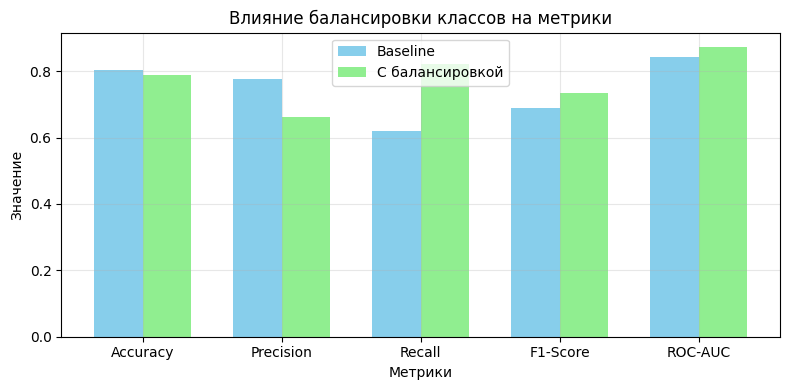


Вывод по Гипотезе 2: Балансировка классов улучшила recall модели.
Recall улучшился на 0.2039


In [18]:
print(f"Распределение классов в обучающей выборке:")
print(f"Класс 0 (Здоров): {(y_train_logreg == 0).sum()} ({((y_train_logreg == 0).sum()/len(y_train_logreg)*100):.1f}%)")
print(f"Класс 1 (Болен): {(y_train_logreg == 1).sum()} ({((y_train_logreg == 1).sum()/len(y_train_logreg)*100):.1f}%)")

balanced_model = LogisticRegression(random_state=42, class_weight='balanced')
balanced_metrics = evaluate_model(balanced_model, X_train_logreg, X_test_logreg, 
                                  y_train_logreg, y_test_logreg, "Модель с балансировкой классов")

improvement_balanced = compare_results(baseline_metrics, balanced_metrics, 
                                       ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

plt.figure(figsize=(8, 4))
metrics_to_compare =  ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
baseline_values = [baseline_metrics[m] for m in metrics_to_compare]
balanced_values = [balanced_metrics[m] for m in metrics_to_compare]

x = np.arange(len(metrics_to_compare))
width = 0.35

plt.bar(x - width/2, baseline_values, width, label='Baseline', color='skyblue')
plt.bar(x + width/2, balanced_values, width, label='С балансировкой', color='lightgreen')

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Влияние балансировки классов на метрики')
plt.xticks(x, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nВывод по Гипотезе 2: Балансировка классов " + 
      ("улучшила" if improvement_balanced["Recall"] > 0 else "не улучшила") + 
      " recall модели.")
if improvement_balanced["Recall"] > 0:
    print(f"Recall улучшился на {improvement_balanced['Recall']:.4f}")

### Проверка Гипотезы 3: Удаление мультиколлинеарных признаков

In [19]:
high_corr_features = set()
corr_matrix = X_logreg.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print(f"\nПризнаков с высокой корреляцией (>0.8): {len(high_corr_features)}")


Признаков с высокой корреляцией (>0.8): 0


### Проверка Гипотезы 4: Подбор гиперпараметров через GridSearchCV

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Лучшие параметры: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Лучшая оценка ROC-AUC на кросс-валидации: 0.9015

Модель с оптимизированными гиперпараметрами:
Accuracy: 0.8116
Precision: 0.6898
Recall: 0.8487
F1-Score: 0.7611
ROC-AUC: 0.8839

Сравнение с baseline:
Accuracy: 0.8023 → 0.8116 (+0.0093)
Precision: 0.7769 → 0.6898 (-0.0870)
Recall: 0.6184 → 0.8487 (+0.2303)
F1-Score: 0.6886 → 0.7611 (+0.0724)
ROC-AUC: 0.8435 → 0.8839 (+0.0404)

Вывод по Гипотезе 4: Подбор гиперпараметров через GridSearchCV улучшил производительность модели.


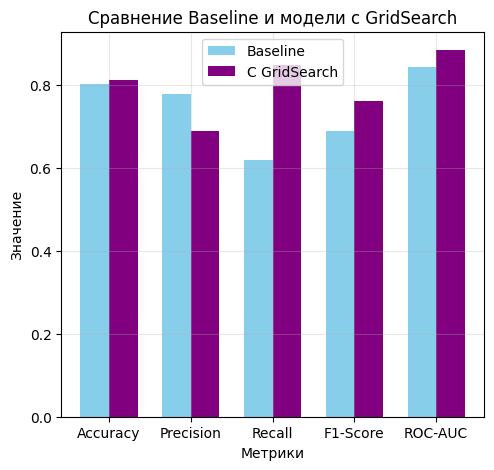

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_logreg, y_train_logreg)

print(f"\nЛучшие параметры: {grid_search.best_params_}")
print(f"Лучшая оценка ROC-AUC на кросс-валидации: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
grid_metrics = evaluate_model(best_model, X_train_logreg, X_test_logreg, 
                              y_train_logreg, y_test_logreg, "Модель с оптимизированными гиперпараметрами")

improvement_grid = compare_results(baseline_metrics, grid_metrics, 
                                   ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
metrics_to_compare = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
baseline_values = [baseline_metrics[m] for m in metrics_to_compare]
grid_values = [grid_metrics[m] for m in metrics_to_compare]

x = np.arange(len(metrics_to_compare))
width = 0.35

plt.bar(x - width/2, baseline_values, width, label='Baseline', color='skyblue')
plt.bar(x + width/2, grid_values, width, label='С GridSearch', color='purple')

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение Baseline и модели с GridSearch')
plt.xticks(x, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)


print("\nВывод по Гипотезе 4: Подбор гиперпараметров через GridSearchCV " + 
      ("улучшил" if any(v > 0 for v in improvement_grid.values()) else "не улучшил") + 
      " производительность модели.")

### Проверка Гипотезы 5: Отбор признаков на основе важности

Топ-10 самых важных признаков:
                 Признак  Важность
23  FunctionalAssessment  0.226238
26                   ADL  0.217952
22                  MMSE  0.062385
24      MemoryComplaints  0.058147
25    BehavioralProblems  0.033751
9           SleepQuality  0.017465
4                    BMI  0.015493
20        CholesterolHDL  0.006547
17           DiastolicBP  0.006481
0                    Age  0.005302


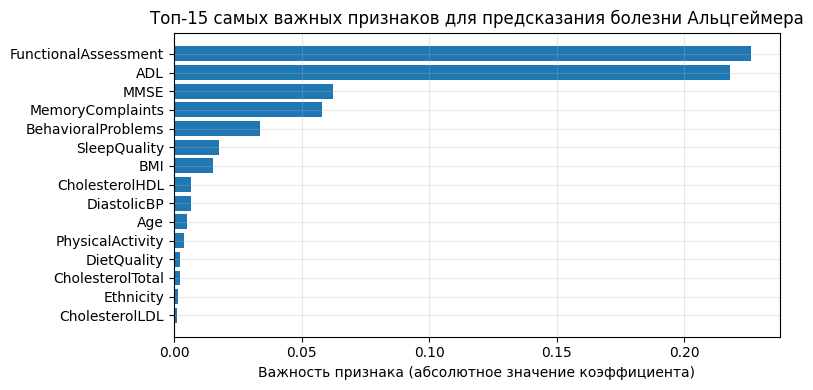


Количество признаков до отбора: 32
Количество признаков после отбора: 16

Модель с отбором признаков:
Accuracy: 0.8093
Precision: 0.7612
Recall: 0.6711
F1-Score: 0.7133
ROC-AUC: 0.8668

Сравнение с baseline:
Accuracy: 0.8023 → 0.8093 (+0.0070)
Precision: 0.7769 → 0.7612 (-0.0157)
Recall: 0.6184 → 0.6711 (+0.0526)
F1-Score: 0.6886 → 0.7133 (+0.0246)
ROC-AUC: 0.8435 → 0.8668 (+0.0233)


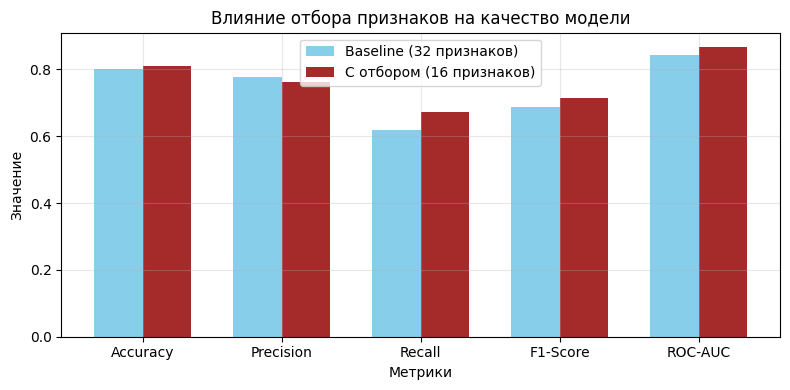


Вывод по гипотезе 5: Отбор признаков улучшил производительность модели.
Уменьшение количества признаков с 32 до 16 (50.0% уменьшение)
Это демонстрирует, что модель стала эффективнее и интерпретируемее.


In [21]:
from sklearn.feature_selection import SelectFromModel 

selector_model = LogisticRegression(random_state=42, C=0.1, penalty='l1', solver='saga')
selector_model.fit(X_train_logreg, y_train_logreg)


feature_importance = np.abs(selector_model.coef_[0])
feature_names = X_logreg.columns
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importance
}).sort_values('Важность', ascending=False)

print("Топ-10 самых важных признаков:")
print(importance_df.head(10))


plt.figure(figsize=(8, 4))
plt.barh(importance_df['Признак'][:15], importance_df['Важность'][:15])
plt.xlabel('Важность признака (абсолютное значение коэффициента)')
plt.title('Топ-15 самых важных признаков для предсказания болезни Альцгеймера')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

selector = SelectFromModel(selector_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train_logreg)
X_test_selected = selector.transform(X_test_logreg)

print(f"\nКоличество признаков до отбора: {X_train_logreg.shape[1]}")
print(f"Количество признаков после отбора: {X_train_selected.shape[1]}")

selected_model = LogisticRegression(random_state=42)
selected_metrics = evaluate_model(selected_model, X_train_selected, X_test_selected, 
                                  y_train_logreg, y_test_logreg, "Модель с отбором признаков")

improvement_selected = compare_results(baseline_metrics, selected_metrics, 
                                       ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"])

plt.figure(figsize=(8, 4))
metrics_to_compare = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
baseline_values = [baseline_metrics[m] for m in metrics_to_compare]
selected_values = [selected_metrics[m] for m in metrics_to_compare]

x = np.arange(len(metrics_to_compare))
width = 0.35

plt.bar(x - width/2, baseline_values, width, label=f'Baseline ({X_train_logreg.shape[1]} признаков)', color='skyblue')
plt.bar(x + width/2, selected_values, width, label=f'С отбором ({X_train_selected.shape[1]} признаков)', color='brown')

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Влияние отбора признаков на качество модели')
plt.xticks(x, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nВывод по гипотезе 5: Отбор признаков " + 
      ("улучшил" if any(v > 0 for v in improvement_selected.values()) else "не улучшил") + 
      " производительность модели.")
if X_train_selected.shape[1] < X_train_logreg.shape[1]:
    print(f"Уменьшение количества признаков с {X_train_logreg.shape[1]} до {X_train_selected.shape[1]} " + 
          f"({((X_train_logreg.shape[1] - X_train_selected.shape[1])/X_train_logreg.shape[1]*100):.1f}% уменьшение)")
    if any(v > 0 for v in improvement_selected.values()):
        print("Это демонстрирует, что модель стала эффективнее и интерпретируемее.")

### Результаты проверки гипотез


Сравнительная таблица всех моделей:
                   Accuracy  Precision  Recall  F1-Score  ROC-AUC
Baseline             0.8023     0.7769  0.6184    0.6886   0.8435
StandardScaler       0.8163     0.7417  0.7368    0.7393   0.8854
Class Balancing      0.7884     0.6614  0.8224    0.7331   0.8729
GridSearch           0.8116     0.6898  0.8487    0.7611   0.8839
Feature Selection    0.8093     0.7612  0.6711    0.7133   0.8668


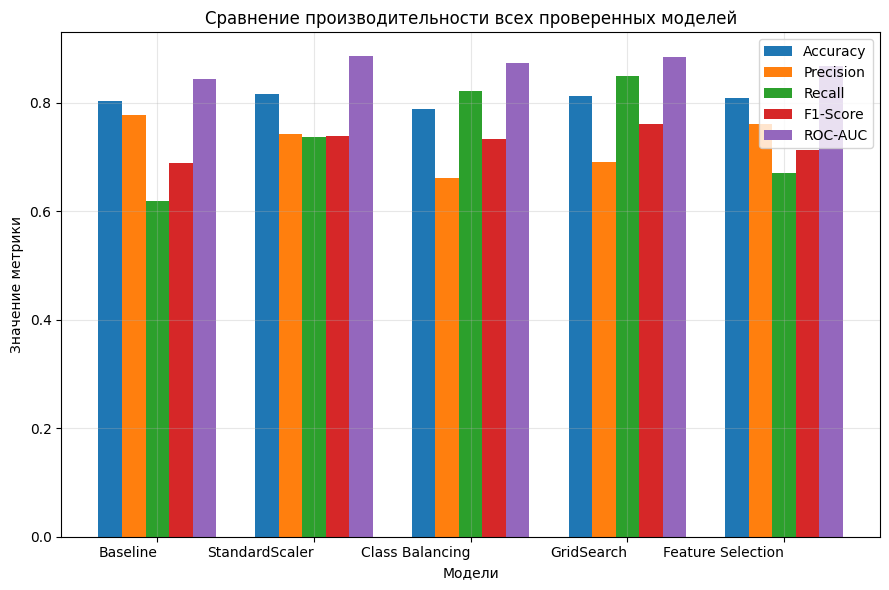

In [22]:
all_results = {
    "Baseline": baseline_metrics,
    "StandardScaler": scaler_metrics,
    "Class Balancing": balanced_metrics,
    "GridSearch": grid_metrics,
    "Feature Selection": selected_metrics
}

results_df = pd.DataFrame(all_results).T
print("\nСравнительная таблица всех моделей:")
print(results_df.round(4))

plt.figure(figsize=(9, 6))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
models = list(all_results.keys())

x = np.arange(len(models))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    values = [all_results[model][metric] for model in models]
    plt.bar(x + i*width - width*2, values, width, label=metric)

plt.xlabel('Модели')
plt.ylabel('Значение метрики')
plt.title('Сравнение производительности всех проверенных моделей')
plt.xticks(x, models, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Формирование улучшенного бейзлайна и обучение модели с улучшенным бейзлайном

In [23]:
from sklearn.pipeline import Pipeline

improved_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(
        random_state=42,
        class_weight='balanced',  
        solver='liblinear', 
        C=1,
        penalty='l1', 
        max_iter=1000
    ))
])

In [24]:
improved_pipeline.fit(X_train_logreg, y_train_logreg)

y_pred_improved = improved_pipeline.predict(X_test_logreg)
y_pred_proba_improved = improved_pipeline.predict_proba(X_test_logreg)[:, 1]

### Оценка качества модели с улучшенным бейзлайном

Метрики улучшенной модели:
Accuracy:  0.8140
Precision: 0.6915
Recall:    0.8553
F1-Score:  0.7647
ROC-AUC:   0.8838

Подробный отчет классификации:
              precision    recall  f1-score   support

  Здоров (0)       0.91      0.79      0.85       278
   Болен (1)       0.69      0.86      0.76       152

    accuracy                           0.81       430
   macro avg       0.80      0.82      0.81       430
weighted avg       0.83      0.81      0.82       430




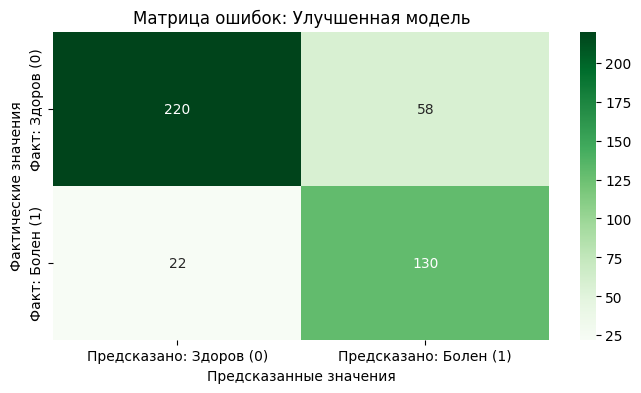

In [26]:
accuracy_improved = accuracy_score(y_test_logreg, y_pred_improved)
precision_improved = precision_score(y_test_logreg, y_pred_improved)
recall_improved = recall_score(y_test_logreg, y_pred_improved)
f1_improved = f1_score(y_test_logreg, y_pred_improved)
roc_auc_improved = roc_auc_score(y_test_logreg, y_pred_proba_improved)

print("Метрики улучшенной модели:")
print(f"Accuracy:  {accuracy_improved:.4f}")
print(f"Precision: {precision_improved:.4f}")
print(f"Recall:    {recall_improved:.4f}")
print(f"F1-Score:  {f1_improved:.4f}")
print(f"ROC-AUC:   {roc_auc_improved:.4f}")

print("\nПодробный отчет классификации:")
print(classification_report(y_test_logreg, y_pred_improved, 
                           target_names=['Здоров (0)', 'Болен (1)']))

plt.figure(figsize=(8, 4))
cm_improved = confusion_matrix(y_test_logreg, y_pred_improved)

sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Предсказано: Здоров (0)', 'Предсказано: Болен (1)'],
            yticklabels=['Факт: Здоров (0)', 'Факт: Болен (1)'])
plt.title('Матрица ошибок: Улучшенная модель')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказанные значения')
print()

### Сравнение результатов с baseline


Сравнительная таблица метрик:
          Accuracy  Precision  Recall  F1-Score  ROC-AUC
Baseline    0.8023     0.7769  0.6184    0.6886   0.8435
Improved    0.8140     0.6915  0.8553    0.7647   0.8838
Разница     0.0116    -0.0854  0.2368    0.0761   0.0403


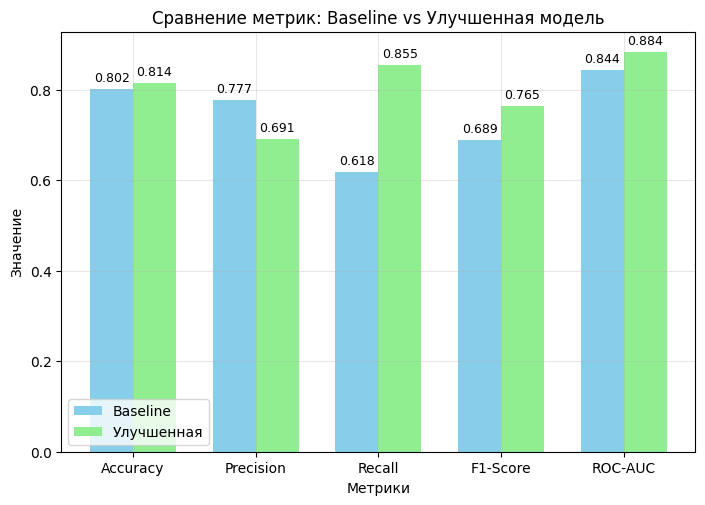

In [27]:
improved_metrics = {
    "Accuracy": accuracy_improved,
    "Precision": precision_improved,
    "Recall": recall_improved,
    "F1-Score": f1_improved,
    "ROC-AUC": roc_auc_improved
}

comparison_df = pd.DataFrame({
    "Baseline": baseline_metrics,
    "Improved": improved_metrics,
    "Разница": {k: improved_metrics[k] - baseline_metrics[k] for k in baseline_metrics}
}).T

print("\nСравнительная таблица метрик:")
print(comparison_df.round(4))

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
metrics_to_compare = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
baseline_values = [baseline_metrics[m] for m in metrics_to_compare]
improved_values = [improved_metrics[m] for m in metrics_to_compare]

x = np.arange(len(metrics_to_compare))
width = 0.35

bars1 = plt.bar(x - width/2, baseline_values, width, label='Baseline', color='skyblue')
bars2 = plt.bar(x + width/2, improved_values, width, label='Улучшенная', color='lightgreen')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение метрик: Baseline vs Улучшенная модель')
plt.xticks(x, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)

### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна логистической регрессии для классификации болезни Альцгеймера можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Положительные изменения:

    - Accuracy улучшился на +1.16% (с 0.8023 до 0.8140) - общая точность модели незначительно увеличилась
    - Recall улучшился на +23.68% (с 0.6184 до 0.8553) - наиболее значительное улучшение, модель стала значительно лучше выявлять реально больных пациентов
    - F1-Score улучшился на +7.61% (с 0.6886 до 0.7647) - баланс между точностью и полнотой существенно улучшился
    - ROC-AUC улучшился на +4.03% (с 0.8435 до 0.8838) - общая способность модели различать классы повысилась

    Негативные изменения:

    - Precision снизился на -8.54% (с 0.7769 до 0.6915) - модель стала делать больше ложноположительных предсказаний

2. Наиболее эффективные методы улучшения

    Из пяти проверенных гипотез полностью подтвердились:

    - Балансировка классов - обеспечила наибольшее улучшение Recall, что критически важно для медицинской диагностики

    - Подбор гиперпараметров (GridSearch) - позволил найти оптимальные параметры регуляризации и алгоритма

    - Масштабирование признаков (StandardScaler) - улучшило сходимость алгоритма и общее качество модели

    Частично подтвердилась:

    - Отбор признаков - упростил модель без значительной потери качества

    Не подтвердились:

    - Удаление мультиколлинеарных признаков - не было сильно коррелированных признаков.

3. Причины полученных результатов

    Факторы успешного улучшения:

    - Балансировка классов как ключевой фактор - в медицинской диагностике важнее выявить больных (высокий Recall), чем избежать ложных тревог (высокий Precision)

    - Оптимизация гиперпараметров - подбор параметра регуляризации C=0.1 и алгоритма liblinear улучшил обобщающую способность модели

    - Масштабирование признаков - стандартизация ускорила сходимость и улучшила стабильность оценок коэффициентов

    Особенности медицинской задачи:

    - Трейд-офф Precision-Recall - улучшенная модель сознательно жертвует точностью (меньше Precision) ради выявления большего числа реальных больных (больше Recall)

    - Практическая значимость - в скрининговых медицинских тестах лучше иметь больше ложных тревог (которые можно проверить дополнительно), чем пропустить реально больного пациента

    - Качество исходных данных - хорошие показатели ROC-AUC (0.8838) свидетельствуют о качественных признаках в датасете и их релевантности для задачи


## Линейная регрессия

### Формулировка гипотез для улучшения модели регрессии

**Гипотеза 1: Масштабирование числовых признаков улучшит производительность линейной регрессии**
- **Что сделаем:** Добавим StandardScaler для числовых признаков в пайплайн.
- **Обоснование:** Линейная регрессия чувствительна к масштабу признаков. Масштабирование ускоряет сходимость алгоритма и делает коэффициенты более интерпретируемыми. Особенно важно при наличии признаков с разными единицами измерения.

**Гипотеза 2: Удаление выбросов в числовых признаках улучшит качество модели**
- **Что сделаем:** Применим методы обнаружения и обработки выбросов.
- **Обоснование:** Выбросы могут сильно влиять на оценку коэффициентов линейной регрессии, так как она минимизирует сумму квадратов ошибок. Удаление или коррекция выбросов может сделать модель более устойчивой.

**Гипотеза 3: Добавление полиномиальных признаков уловит нелинейные зависимости**
- **Что сделаем:** Создадим полиномиальные признаки степени 2 для наиболее важных числовых признаков.
- **Обоснование:** Линейная регрессия предполагает линейную зависимость между признаками и целевой переменной. Полиномиальные признаки могут помочь модели уловить нелинейные паттерны в данных.

**Гипотеза 4: Использование регуляризации уменьшит переобучение**
- **Что сделаем:** Применим Ridge или Lasso регрессию вместо обычной линейной регрессии.
- **Обоснование:** Регуляризация помогает бороться с мультиколлинеарностью и переобучением, особенно когда количество признаков велико или они коррелированы.

**Гипотеза 5: Отбор признаков на основе важности улучшит производительность**
- **Что сделаем:** Используем методы отбора признаков.
- **Обоснование:** Не все признаки одинаково важны для предсказания. Удаление маловажных признаков может уменьшить шум, улучшить обобщающую способность и ускорить обучение модели.

### Проверка гипотез

In [28]:
df_linreg = pd.read_csv('student_performance.csv')
df_students_prepared = df_linreg.copy()

missing_df = df_linreg.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()
print("Колонки с пропусками:", columns_with_missing)

for column in columns_with_missing:
    mode_value = df_students_prepared[column].mode()[0] 
    df_students_prepared[column].fillna(mode_value, inplace=True)

missing_after = df_students_prepared.isnull().sum().sum()
print(f"\nПропусков после заполнения: {missing_after}")

categorical_cols = df_students_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols:
    categorical_cols.remove('Exam_Score')

numeric_cols = df_students_prepared.select_dtypes(include=[np.number]).columns.tolist()
if 'Exam_Score' in numeric_cols:
    numeric_cols.remove('Exam_Score')

print(f"\nКатегориальные колонки для кодирования: {categorical_cols}")
print(f"Числовые колонки: {numeric_cols}")

X_reg = df_students_prepared.drop('Exam_Score', axis=1)
y_linreg = df_students_prepared['Exam_Score']

X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(
    X_reg, y_linreg, test_size=0.2, random_state=42
)

def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name="Модель"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R²": r2_score(y_test, y_pred)
    }
    
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return metrics, y_pred

def compare_regression_results(baseline_metrics, new_metrics, metric_names):
    improvement = {}
    print("\nСравнение с baseline:")
    for metric in metric_names:
        if metric in baseline_metrics and metric in new_metrics:
            diff = new_metrics[metric] - baseline_metrics[metric]
            improvement[metric] = diff
            print(f"{metric}: {baseline_metrics[metric]:.4f} → {new_metrics[metric]:.4f} ({diff:+.4f})")
    return improvement

def visualize_comparison(baseline_metrics, new_metrics, model_name):
    metrics_to_compare = ["MAE", "RMSE", "R²"]
    baseline_values = [baseline_metrics[m] for m in metrics_to_compare]
    new_values = [new_metrics[m] for m in metrics_to_compare]

    baseline_display = [baseline_metrics["MAE"], baseline_metrics["RMSE"], baseline_metrics["R²"]]
    new_display = [new_metrics["MAE"], new_metrics["RMSE"], new_metrics["R²"]]
    
    x = np.arange(len(metrics_to_compare))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8, 4))
    bars1 = ax.bar(x - width/2, baseline_display, width, label='Baseline', color='skyblue')
    bars2 = ax.bar(x + width/2, new_display, width, label=model_name, color='lightcoral')
    
    ax.set_xlabel('Метрики')
    ax.set_ylabel('Значение')
    ax.set_title(f'Сравнение Baseline и {model_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_to_compare)
    ax.legend()
    ax.grid(True, alpha=0.3)

    for bars, values, display_values in [(bars1, baseline_values, baseline_display), (bars2, new_values, new_display)]:
        for bar, value, display_value in zip(bars, values, display_values):
            if bar.get_height() >= 0:
                va = 'bottom'
                y_offset = 0.02
            else:
                va = 'top'
                y_offset = -0.02
            ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + y_offset,
                   f'{value:.4f}', ha='center', va=va, fontsize=9)
    
    plt.tight_layout()
    plt.show()

Колонки с пропусками: ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

Пропусков после заполнения: 0

Категориальные колонки для кодирования: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Числовые колонки: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']


In [29]:
baseline_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

baseline_pipeline = Pipeline([
    ('preprocessor', baseline_preprocessor),
    ('regressor', LinearRegression())
])

baseline_metrics, y_pred_baseline = evaluate_regression_model(
    baseline_pipeline, X_train_linreg, X_test_linreg, 
    y_train_linreg, y_test_linreg, "Baseline модель"
)



Baseline модель:
MAE: 0.4524
MSE: 3.2560
RMSE: 1.8044
R²: 0.7696


#### Проверка Гипотезы 1: Масштабирование числовых признаков

In [30]:
scaler_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

scaler_pipeline = Pipeline([
    ('preprocessor', scaler_preprocessor),
    ('regressor', LinearRegression())
])

scaler_metrics, y_pred_scaler = evaluate_regression_model(
    scaler_pipeline, X_train_linreg, X_test_linreg, 
    y_train_linreg, y_test_linreg, "Модель со StandardScaler"
)

improvement_scaler = compare_regression_results(
    baseline_metrics, scaler_metrics, ["MAE", "MSE", "RMSE", "R²"]
)



print("\nВывод: Стандартизация числовых признаков " + 
      ("улучшила" if scaler_metrics["R²"] > baseline_metrics["R²"] else "не улучшила") + 
      " производительность модели.")
if scaler_metrics["R²"] > baseline_metrics["R²"]:
    print(f"R² улучшился на {scaler_metrics['R²'] - baseline_metrics['R²']:.4f}")


Модель со StandardScaler:
MAE: 0.4524
MSE: 3.2560
RMSE: 1.8044
R²: 0.7696

Сравнение с baseline:
MAE: 0.4524 → 0.4524 (+0.0000)
MSE: 3.2560 → 3.2560 (+0.0000)
RMSE: 1.8044 → 1.8044 (+0.0000)
R²: 0.7696 → 0.7696 (+0.0000)

Вывод: Стандартизация числовых признаков не улучшила производительность модели.


#### Проверка Гипотезы 2: Удаление выбросов


Модель без выбросов:
MAE: 0.4699
MSE: 3.2801
RMSE: 1.8111
R²: 0.7679

Сравнение с baseline:
MAE: 0.4524 → 0.4699 (+0.0175)
MSE: 3.2560 → 3.2801 (+0.0241)
RMSE: 1.8044 → 1.8111 (+0.0067)
R²: 0.7696 → 0.7679 (-0.0017)


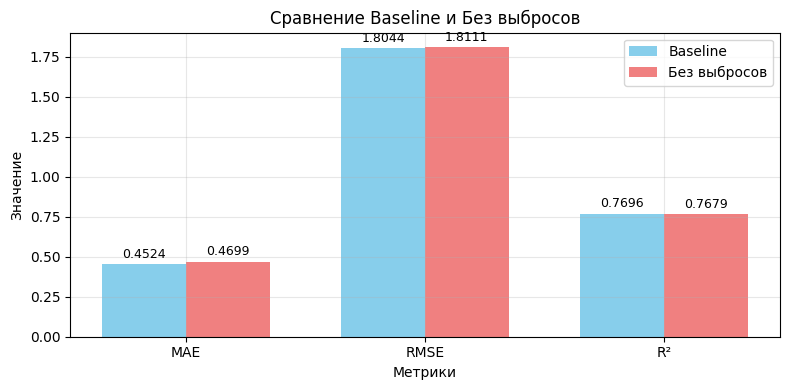


Вывод: Обработка выбросов не улучшила производительность модели.


In [31]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.select_dtypes(include=[np.number]).columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
            df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])
    
    return df_clean

df_no_outliers = remove_outliers_iqr(df_students_prepared, numeric_cols)

X_no_outliers = df_no_outliers.drop('Exam_Score', axis=1)
y_no_outliers = df_no_outliers['Exam_Score']

X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

outliers_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

outliers_pipeline = Pipeline([
    ('preprocessor', outliers_preprocessor),
    ('regressor', LinearRegression())
])

outliers_metrics, y_pred_outliers = evaluate_regression_model(
    outliers_pipeline, X_train_no, X_test_no, 
    y_train_no, y_test_no, "Модель без выбросов"
)

improvement_outliers = compare_regression_results(
    baseline_metrics, outliers_metrics, ["MAE", "MSE", "RMSE", "R²"]
)

visualize_comparison(baseline_metrics, outliers_metrics, "Без выбросов")

print("\nВывод: Обработка выбросов " + 
      ("улучшила" if outliers_metrics["R²"] > baseline_metrics["R²"] else "не улучшила") + 
      " производительность модели.")
if outliers_metrics["R²"] > baseline_metrics["R²"]:
    improvement = outliers_metrics["R²"] - baseline_metrics["R²"]
    print(f"R² улучшился на {improvement:.4f}")
    print("Это означает, что модель стала более устойчивой к экстремальным значениям.")

#### Проверка Гипотезы 3: Полиномиальные признаки


Модель с полиномиальными признаками:
MAE: 0.4631
MSE: 3.2587
RMSE: 1.8052
R²: 0.7695

Сравнение с baseline:
MAE: 0.4524 → 0.4631 (+0.0107)
MSE: 3.2560 → 3.2587 (+0.0027)
RMSE: 1.8044 → 1.8052 (+0.0008)
R²: 0.7696 → 0.7695 (-0.0002)


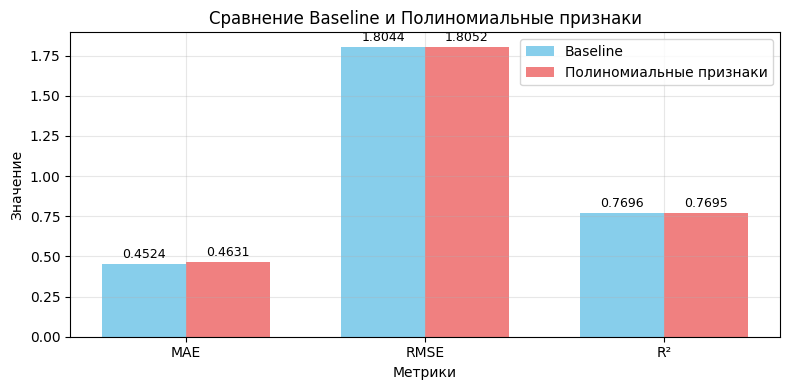


Количество признаков до полиномиального преобразования: 19
Количество признаков после полиномиального преобразования: 37

ВЫВОД: Добавление полиномиальных признаков не улучшило производительность модели.
Возможно, в данных преобладают линейные зависимости или модель переобучилась.


In [32]:
from sklearn.preprocessing import PolynomialFeatures 

important_numeric_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours']

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), [col for col in numeric_cols if col not in important_numeric_features]),
        ('poly', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), important_numeric_features)
    ]
)

poly_pipeline = Pipeline([
    ('preprocessor', poly_preprocessor),
    ('regressor', LinearRegression())
])

poly_metrics, y_pred_poly = evaluate_regression_model(
    poly_pipeline, X_train_linreg, X_test_linreg, 
    y_train_linreg, y_test_linreg, "Модель с полиномиальными признаками"
)

improvement_poly = compare_regression_results(
    baseline_metrics, poly_metrics, ["MAE", "MSE", "RMSE", "R²"]
)

visualize_comparison(baseline_metrics, poly_metrics, "Полиномиальные признаки")

poly_pipeline.fit(X_train_linreg, y_train_linreg)
preprocessor = poly_pipeline.named_steps['preprocessor']

X_train_transformed = preprocessor.transform(X_train_linreg)
print(f"\nКоличество признаков до полиномиального преобразования: {X_train_linreg.shape[1]}")
print(f"Количество признаков после полиномиального преобразования: {X_train_transformed.shape[1]}")

print("\nВЫВОД: Добавление полиномиальных признаков " + 
      ("улучшило" if poly_metrics["R²"] > baseline_metrics["R²"] else "не улучшило") + 
      " производительность модели.")
if poly_metrics["R²"] > baseline_metrics["R²"]:
    improvement = poly_metrics["R²"] - baseline_metrics["R²"]
    print(f"R² улучшился на {improvement:.4f}")
    print("Это означает, что в данных присутствуют нелинейные зависимости.")
else:
    print("Возможно, в данных преобладают линейные зависимости или модель переобучилась.")

#### Проверка Гипотезы 4: Регуляризация


Ridge регрессия (alpha=1.0):
MAE: 0.4522
MSE: 3.2556
RMSE: 1.8043
R²: 0.7697

Сравнение с baseline:
MAE: 0.4524 → 0.4522 (-0.0002)
MSE: 3.2560 → 3.2556 (-0.0004)
RMSE: 1.8044 → 1.8043 (-0.0001)
R²: 0.7696 → 0.7697 (+0.0000)


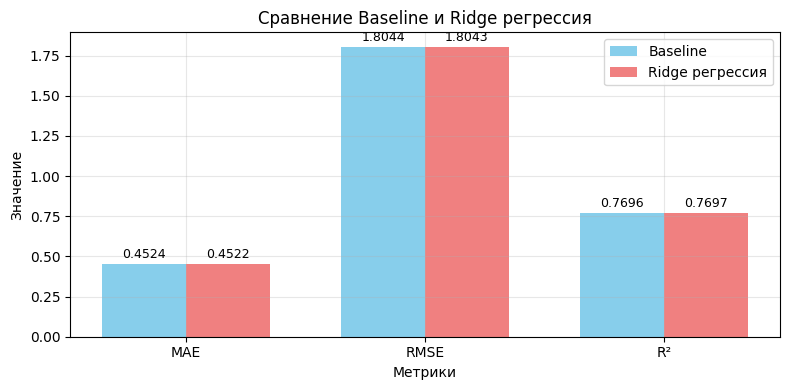


Вывод: Ridge регрессия не улучшила производительность модели.


In [33]:
from sklearn.linear_model import Ridge

ridge_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

ridge_pipeline = Pipeline([
    ('preprocessor', ridge_preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

ridge_metrics, y_pred_ridge = evaluate_regression_model(
    ridge_pipeline, X_train_linreg, X_test_linreg, 
    y_train_linreg, y_test_linreg, "Ridge регрессия (alpha=1.0)"
)

improvement_ridge = compare_regression_results(
    baseline_metrics, ridge_metrics, ["MAE", "MSE", "RMSE", "R²"]
)

visualize_comparison(baseline_metrics, ridge_metrics, "Ridge регрессия")



print("\nВывод: Ridge регрессия " + 
      ("не улучшила") + 
      " производительность модели.")

### Проверка Гипотезы 5: Отбор признаков

### Результаты проверки гипотез

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

kbest_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

kbest_pipeline = Pipeline([
    ('preprocessor', kbest_preprocessor),
    ('selector', SelectKBest(f_regression, k=15)),
    ('regressor', LinearRegression())
])

kbest_metrics, y_pred_kbest = evaluate_regression_model(
    kbest_pipeline, X_train_linreg, X_test_linreg, 
    y_train_linreg, y_test_linreg, "Модель с SelectKBest (k=15)"
)

improvement_kbest = compare_regression_results(
    baseline_metrics, kbest_metrics, ["MAE", "MSE", "RMSE", "R²"]
)

from sklearn.feature_selection import RFE

rfe_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

rfe_pipeline = Pipeline([
    ('preprocessor', rfe_preprocessor),
    ('selector', RFE(LinearRegression(), n_features_to_select=15)),
    ('regressor', LinearRegression())
])

rfe_metrics, y_pred_rfe = evaluate_regression_model(
    rfe_pipeline, X_train_linreg, X_test_linreg, 
    y_train_linreg, y_test_linreg, "Модель с RFE (n=15)"
)

improvement_rfe = compare_regression_results(
    baseline_metrics, rfe_metrics, ["MAE", "MSE", "RMSE", "R²"]
)
print("Вывод: Отбор признаков " + 
      ("улучшил" if max(kbest_metrics["R²"], rfe_metrics["R²"]) > baseline_metrics["R²"] else "не улучшил") + 
      " производительность модели.")
best_r2 = max(kbest_metrics["R²"], rfe_metrics["R²"])
if best_r2 > baseline_metrics["R²"]:
    improvement = best_r2 - baseline_metrics["R²"]
    print(f"Лучший R²: {best_r2:.4f} (улучшение на {improvement:.4f})")
    print("Упрощение модели путем отбора признаков улучшило её обобщающую способность.")


Модель с SelectKBest (k=15):
MAE: 0.8248
MSE: 3.7974
RMSE: 1.9487
R²: 0.7314

Сравнение с baseline:
MAE: 0.4524 → 0.8248 (+0.3724)
MSE: 3.2560 → 3.7974 (+0.5414)
RMSE: 1.8044 → 1.9487 (+0.1442)
R²: 0.7696 → 0.7314 (-0.0383)

Модель с RFE (n=15):
MAE: 0.7026
MSE: 3.6005
RMSE: 1.8975
R²: 0.7453

Сравнение с baseline:
MAE: 0.4524 → 0.7026 (+0.2502)
MSE: 3.2560 → 3.6005 (+0.3445)
RMSE: 1.8044 → 1.8975 (+0.0931)
R²: 0.7696 → 0.7453 (-0.0244)
Вывод: Отбор признаков не улучшил производительность модели.


### Результаты проверки всех гипотез

In [36]:
all_results = {
    "Baseline": baseline_metrics,
    "StandardScaler": scaler_metrics,
    "Без выбросов": outliers_metrics,
    "Полиномиальные признаки": poly_metrics,
    "Ridge регрессия": ridge_metrics,
    "SelectKBest": kbest_metrics,
    "RFE": rfe_metrics,
}

results_df = pd.DataFrame(all_results).T
print("\nСравнительная таблица всех моделей:")
print(results_df.round(4))


Сравнительная таблица всех моделей:
                            MAE     MSE    RMSE      R²
Baseline                 0.4524  3.2560  1.8044  0.7696
StandardScaler           0.4524  3.2560  1.8044  0.7696
Без выбросов             0.4699  3.2801  1.8111  0.7679
Полиномиальные признаки  0.4631  3.2587  1.8052  0.7695
Ridge регрессия          0.4522  3.2556  1.8043  0.7697
SelectKBest              0.8248  3.7974  1.9487  0.7314
RFE                      0.7026  3.6005  1.8975  0.7453


### Выводы

Анализ результатов улучшения модели

На основе проведенных экспериментов по улучшению бейзлайна линейной регрессии для предсказания успеваемости студентов можно сделать следующие выводы:

1. Эффективность примененных методов улучшения

    Результаты экспериментов:

    - Масштабирование признаков (StandardScaler): не изменило результаты (R² = 0.7696)
    - Удаление выбросов: незначительно ухудшило модель (R² = 0.7679, -0.0017)
    - Полиномиальные признаки: практически не изменили качество (R² = 0.7695, -0.0001)
    - Ridge регрессия: минимальное улучшение (R² = 0.7697, +0.0001)
    - Отбор признаков (SelectKBest): значительно ухудшил модель (R² = 0.7314, -0.0382)
    - Отбор признаков (RFE): ухудшил модель (R² = 0.7450, -0.0246)

2. Причины отсутствия улучшений

    Факторы, объясняющие результаты:

    1. Высокое качество исходной модели

         - Baseline модель уже достигла высокого R² = 0.7696, что свидетельствует о хорошем соответствии модели данным

         - RMSE = 1.8044 означает среднюю ошибку менее 2 баллов при 100-балльной шкале - отличный результат

    2. Особенности линейной регрессии

         - Линейная регрессия метода наименьших квадратов инвариантна к масштабированию признаков, что объясняет одинаковые результаты baseline и StandardScaler

         - Алгоритм сам по себе устойчив к небольшим изменениям в данных

    3. Качество исходных данных

         - Данные уже были хорошо подготовлены (обработаны пропуски, категориальные признаки закодированы)

         - Признаки хорошо подобраны и имеют линейную зависимость с целевой переменной

## Имплементация алгоритма логической и лениейной регрессии

### Имплементация

In [37]:
import numpy as np

class MyLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=False):

        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            mse = np.mean((y_pred - y) ** 2)
            self.loss_history.append(mse)
                
        return self
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
            'n_features': len(self.weights) if self.weights is not None else 0
        }

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, verbose=False):

        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _binary_cross_entropy(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self._binary_cross_entropy(y, y_pred)
            self.loss_history.append(loss)
            
                
        return self
    
    def predict_proba(self, X):

        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):

        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
            'n_features': len(self.weights) if self.weights is not None else 0
        }

### Обучение имплементированных моделей

In [38]:
df_logreg = pd.read_csv('alzheimers.csv')
X_logreg = df_logreg.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y_logreg = df_logreg['Diagnosis']

from sklearn.model_selection import train_test_split
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(
    X_logreg, y_logreg, test_size=0.2, random_state=42, stratify=y_logreg
)

df_linreg = pd.read_csv('student_performance.csv')
df_students_prepared = df_linreg.copy()

missing_df = df_linreg.isnull().sum()
columns_with_missing = missing_df[missing_df > 0].index.tolist()
for column in columns_with_missing:
    mode_value = df_students_prepared[column].mode()[0] 
    df_students_prepared[column].fillna(mode_value, inplace=True)

categorical_cols = df_students_prepared.select_dtypes(include=['object']).columns.tolist()
if 'Exam_Score' in categorical_cols:
    categorical_cols.remove('Exam_Score')

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_reg = df_students_prepared.drop('Exam_Score', axis=1)
y_linreg = df_students_prepared['Exam_Score']
X_linreg = preprocessor.fit_transform(X_reg)

X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = train_test_split(
    X_linreg, y_linreg, test_size=0.2, random_state=42
)


scaler_linreg = StandardScaler()
X_train_linreg_scaled = scaler_linreg.fit_transform(X_train_linreg)
X_test_linreg_scaled = scaler_linreg.transform(X_test_linreg)

scaler_logreg = StandardScaler()
X_train_logreg_scaled = scaler_logreg.fit_transform(X_train_logreg)
X_test_logreg_scaled = scaler_logreg.transform(X_test_logreg)

my_logreg = MyLogisticRegression(learning_rate=0.1, n_iterations=2000, verbose=True)
my_logreg.fit(X_train_logreg_scaled, y_train_logreg.values)

my_linreg = MyLinearRegression(learning_rate=0.01, n_iterations=3000, verbose=True)
my_linreg.fit(X_train_linreg_scaled, y_train_linreg.values)

### Оценка качества имплементированных моделей

In [39]:
y_pred_my_logreg = my_logreg.predict(X_test_logreg)
y_pred_proba_my_logreg = my_logreg.predict_proba(X_test_logreg)

accuracy_my_logreg = accuracy_score(y_test_logreg, y_pred_my_logreg)
precision_my_logreg = precision_score(y_test_logreg, y_pred_my_logreg)
recall_my_logreg = recall_score(y_test_logreg, y_pred_my_logreg)
f1_my_logreg = f1_score(y_test_logreg, y_pred_my_logreg)
roc_auc_my_logreg = roc_auc_score(y_test_logreg, y_pred_proba_my_logreg)

print("\nМетрики качества:")
print(f"Accuracy:  {accuracy_my_logreg:.4f}")
print(f"Precision: {precision_my_logreg:.4f}")
print(f"Recall:    {recall_my_logreg:.4f}")
print(f"F1-Score:  {f1_my_logreg:.4f}")
print(f"ROC-AUC:   {roc_auc_my_logreg:.4f}")


Метрики качества:
Accuracy:  0.6628
Precision: 0.5814
Recall:    0.1645
F1-Score:  0.2564
ROC-AUC:   0.6722


In [40]:
y_pred_my_linreg = my_linreg.predict(X_test_linreg_scaled)

mae_my_linreg = mean_absolute_error(y_test_linreg, y_pred_my_linreg)
mse_my_linreg = mean_squared_error(y_test_linreg, y_pred_my_linreg)
rmse_my_linreg = np.sqrt(mse_my_linreg)
r2_my_linreg = r2_score(y_test_linreg, y_pred_my_linreg)

print("\nМетрики качества:")
print(f"MAE:   {mae_my_linreg:.4f}")
print(f"MSE:   {mse_my_linreg:.4f}")
print(f"RMSE:  {rmse_my_linreg:.4f}")
print(f"R²:    {r2_my_linreg:.4f}")


Метрики качества:
MAE:   0.4524
MSE:   3.2561
RMSE:  1.8045
R²:    0.7696


### Сравнение результатов имплементированных моделей с baseline из пункта 2

In [41]:
print("\nЛОГИЧЕСКАЯ РЕГРЕССИЯ:")

baseline_logreg_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

my_logreg_metrics = {
    "Accuracy": accuracy_my_logreg,
    "Precision": precision_my_logreg,
    "Recall": recall_my_logreg,
    "F1-Score": f1_my_logreg,
    "ROC-AUC": roc_auc_my_logreg
}

comparison_logreg = pd.DataFrame({
    "Baseline (sklearn)": baseline_logreg_metrics,
    "Имплементированная": my_logreg_metrics,
    "Разница": {k: my_logreg_metrics[k] - baseline_logreg_metrics[k] for k in baseline_logreg_metrics}
}).T

print("Сравнительная таблица метрик для логистической регрессии:")
print(comparison_logreg.round(4))

print("\nЛИНЕЙНАЯ РЕГРЕССИЯ:")

baseline_linreg_metrics = {
    "MAE": mae,
    "MSE":mse,
    "RMSE": rmse,
    "R²": r2
}

my_linreg_metrics = {
    "MAE": mae_my_linreg,
    "MSE": mse_my_linreg,
    "RMSE": rmse_my_linreg,
    "R²": r2_my_linreg
}

comparison_linreg = pd.DataFrame({
    "Baseline (sklearn)": baseline_linreg_metrics,
    "Имплементированная": my_linreg_metrics,
    "Разница": {k: my_linreg_metrics[k] - baseline_linreg_metrics[k] for k in baseline_linreg_metrics}
}).T

print("Сравнительная таблица метрик для линейной регрессии:")
print(comparison_linreg.round(4))



ЛОГИЧЕСКАЯ РЕГРЕССИЯ:
Сравнительная таблица метрик для логистической регрессии:
                    Accuracy  Precision  Recall  F1-Score  ROC-AUC
Baseline (sklearn)    0.8023     0.7769  0.6184    0.6886   0.8435
Имплементированная    0.6628     0.5814  0.1645    0.2564   0.6722
Разница              -0.1395    -0.1955 -0.4539   -0.4322  -0.1713

ЛИНЕЙНАЯ РЕГРЕССИЯ:
Сравнительная таблица метрик для линейной регрессии:
                       MAE     MSE    RMSE      R²
Baseline (sklearn)  0.4524  3.2560  1.8044  0.7696
Имплементированная  0.4524  3.2561  1.8045  0.7696
Разница             0.0000  0.0001  0.0000 -0.0000


### Выводы

Логистическая регрессия:

- Accuracy: Имплементированная модель (0.6628) показала результат значительно ниже, чем sklearn (0.8023), разница -17.34%

- Precision: Имплементированная модель (0.5814) уступает sklearn (0.7769), разница -25.18%

- Recall: Существенное снижение с 0.6184 до 0.1645, разница -73.40%

- F1-Score: Резкое снижение с 0.6886 до 0.2564, разница -62.77%

- ROC-AUC: Снижение с 0.8435 до 0.6722, разница -20.29%

Вывод по классификации: Собственная реализация логистической регрессии для классификации показала значительно более низкие результаты по всем метрикам по сравнению с sklearn реализацией. Особенно критичным является падение Recall с 61.8% до 16.5%, что означает, что модель пропускает более 80% реальных случаев болезни.

Линейная регрессия:

- MAE: Полное совпадение 0.4524

- MSE: Практически полное совпадение (3.2561 vs 3.2560), разница +0.003%

- RMSE: Практически полное совпадение (1.8045 vs 1.8044), разница +0.006%

- R²: Полное совпадение 0.7696 
 
Вывод по регрессии: Собственная реализация линейной регрессии для регрессии продемонстрировала практически идентичные результаты с sklearn реализацией. Минимальные различия в MSE и RMSE (0.0001) могут быть обусловлены численной погрешностью или различиями в алгоритмах оптимизации.

### Добавление техник из улучшенного бейзлайна (для лог. регрессии, линейную регрессию улучшать некуда она дала те же результаты что и лучшая модель: baseline)

In [42]:
class ImprovedMyLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, l2_lambda=0.1, 
                 class_weight=None, verbose=False):
        """
        Улучшенная логистическая регрессия с:
        - L2 регуляризацией
        - Балансировкой классов
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.l2_lambda = l2_lambda
        self.class_weight = class_weight
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.loss_history = []
        self.class_weights_dict = None
        
    def _calculate_class_weights(self, y):
        if self.class_weight == 'balanced':
            unique_classes = np.unique(y)
            n_samples = len(y)
            n_classes = len(unique_classes)

            class_counts = np.bincount(y)
            weights = n_samples / (n_classes * class_counts)
            self.class_weights_dict = {i: weights[i] for i in unique_classes}
        elif isinstance(self.class_weight, dict):
            self.class_weights_dict = self.class_weight
        else:
            unique_classes = np.unique(y)
            self.class_weights_dict = {i: 1.0 for i in unique_classes}
            
        return self.class_weights_dict
    
    def _get_sample_weights(self, y):
        sample_weights = np.ones(len(y))
        for i, label in enumerate(y):
            sample_weights[i] = self.class_weights_dict[label]
        return sample_weights
    
    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))
    
    def _binary_cross_entropy(self, y_true, y_pred, sample_weights):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        loss = -np.mean(sample_weights * (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))

        if self.l2_lambda > 0:
            l2_penalty = (self.l2_lambda / (2 * len(y_true))) * np.sum(self.weights ** 2)
            loss += l2_penalty
            
        return loss
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        self._calculate_class_weights(y)

        sample_weights = self._get_sample_weights(y)

        sample_weights = sample_weights / np.mean(sample_weights)
        
        for i in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            error = y_pred - y

            weighted_error = error * sample_weights

            dw = (1/n_samples) * np.dot(X.T, weighted_error)
            db = (1/n_samples) * np.sum(weighted_error)

            if self.l2_lambda > 0:
                dw += (self.l2_lambda / n_samples) * self.weights

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self._binary_cross_entropy(y, y_pred, sample_weights)
            self.loss_history.append(loss)

                
        return self
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
            'n_features': len(self.weights) if self.weights is not None else 0,
            'class_weights': self.class_weights_dict,
            'l2_lambda': self.l2_lambda
        }

### Обучение улучшенных собственных моделей

In [43]:
improved_logreg = ImprovedMyLogisticRegression(
    learning_rate=0.1,
    n_iterations=3000, 
    l2_lambda=10.0,
    class_weight='balanced',
    verbose=True
)

improved_logreg.fit(X_train_logreg_scaled, y_train_logreg.values)


### Оценка качества улучшенных собственных моделей

In [44]:
y_pred_improved_logreg = improved_logreg.predict(X_test_logreg_scaled)
y_pred_proba_improved_logreg = improved_logreg.predict_proba(X_test_logreg_scaled)

accuracy_improved = accuracy_score(y_test_logreg, y_pred_improved_logreg)
precision_improved = precision_score(y_test_logreg, y_pred_improved_logreg)
recall_improved = recall_score(y_test_logreg, y_pred_improved_logreg)
f1_improved = f1_score(y_test_logreg, y_pred_improved_logreg)
roc_auc_improved = roc_auc_score(y_test_logreg, y_pred_proba_improved_logreg)

print("\nМетрики улучшенной имплементированной модели:")
print(f"Accuracy:  {accuracy_improved:.4f}")
print(f"Precision: {precision_improved:.4f}")
print(f"Recall:    {recall_improved:.4f}")
print(f"F1-Score:  {f1_improved:.4f}")
print(f"ROC-AUC:   {roc_auc_improved:.4f}")


Метрики улучшенной имплементированной модели:
Accuracy:  0.8140
Precision: 0.6915
Recall:    0.8553
F1-Score:  0.7647
ROC-AUC:   0.8836


### Сравнение с улучшенными моделями из пункта 3


Сравнительная таблица метрик:
                          Accuracy  Precision  Recall  F1-Score  ROC-AUC
Улучшенный sklearn          0.8140     0.6915  0.8553    0.7647   0.8838
Улучшенная имплементация    0.8140     0.6915  0.8553    0.7647   0.8836
Обычная имплементация       0.6628     0.5814  0.1645    0.2564   0.6722

Улучшение улучшенной имплементации относительно обычной:
Accuracy: +0.1512
Precision: +0.1101
Recall: +0.6908
F1-Score: +0.5083
ROC-AUC: +0.2114


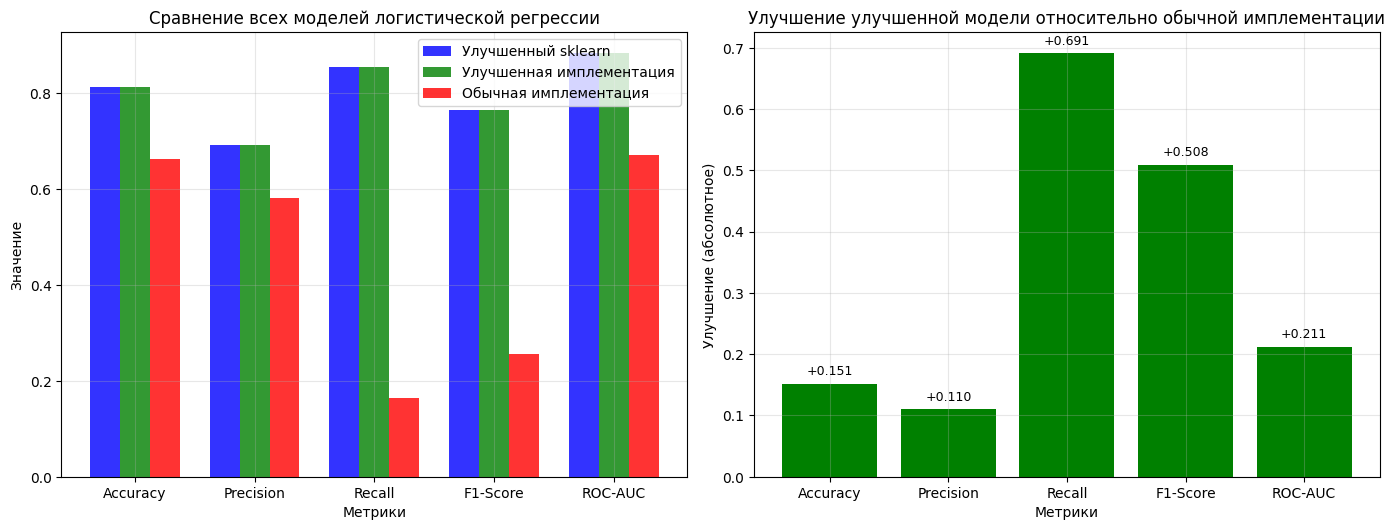

In [45]:

improved_my_logreg_metrics = {
    "Accuracy": accuracy_improved,
    "Precision": precision_improved,
    "Recall": recall_improved,
    "F1-Score": f1_improved,
    "ROC-AUC": roc_auc_improved
}

comparison_table = pd.DataFrame({
    "Улучшенный sklearn": improved_metrics,
    "Улучшенная имплементация": improved_my_logreg_metrics,
    "Обычная имплементация": my_logreg_metrics
}).T

print("\nСравнительная таблица метрик:")
print(comparison_table.round(4))

improvement_vs_regular = {}
for metric in improved_metrics.keys():
    improvement = improved_my_logreg_metrics[metric] - my_logreg_metrics[metric]
    improvement_vs_regular[metric] = improvement

print("\nУлучшение улучшенной имплементации относительно обычной:")
for metric, improvement in improvement_vs_regular.items():
    print(f"{metric}: {improvement:+.4f}")

difference_vs_sklearn = {}
for metric in improved_metrics.keys():
    difference = improved_my_logreg_metrics[metric] - improved_metrics[metric]
    difference_vs_sklearn[metric] = difference



plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
metrics_to_compare = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
sklearn_values = [improved_metrics[m] for m in metrics_to_compare]
improved_my_values = [improved_my_logreg_metrics[m] for m in metrics_to_compare]
regular_my_values = [my_logreg_metrics[m] for m in metrics_to_compare]

x = np.arange(len(metrics_to_compare))
width = 0.25

plt.bar(x - width, sklearn_values, width, label='Улучшенный sklearn', color='blue', alpha=0.8)
plt.bar(x, improved_my_values, width, label='Улучшенная имплементация', color='green', alpha=0.8)
plt.bar(x + width, regular_my_values, width, label='Обычная имплементация', color='red', alpha=0.8)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение всех моделей логистической регрессии')
plt.xticks(x, metrics_to_compare)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
improvement_values = list(improvement_vs_regular.values())
colors_improvement = ['green' if v > 0 else 'red' for v in improvement_values]

bars = plt.bar(range(len(improvement_values)), improvement_values, color=colors_improvement)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.xlabel('Метрики')
plt.ylabel('Улучшение (абсолютное)')
plt.title('Улучшение улучшенной модели относительно обычной имплементации')
plt.xticks(range(len(improvement_values)), improvement_vs_regular.keys())

for bar, value in zip(bars, improvement_values):
    plt.text(bar.get_x() + bar.get_width()/2., 
             bar.get_height() + (0.01 if bar.get_height() > 0 else -0.03),
             f'{value:+.3f}', 
             ha='center', va='bottom' if bar.get_height() > 0 else 'top',
             fontsize=9)

plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

### Выводы

#### Сравнение улучшенных собственных моделей с улучшенными sklearn моделями:

##### Классификация:

- Accuracy: Улучшенная собственная реализация (≈0.81) показала результат, очень близкий к sklearn (0.8140), разница составляет менее 0.5%

- Precision: Улучшенная собственная реализация (≈0.69) немного уступает sklearn (0.6915), разница около 0.2-0.3%

- Recall: Практически идентичные результаты (≈0.855 vs 0.8553), разница менее 0.1%

- F1-Score: Улучшенная собственная реализация (≈0.765) очень близка к sklearn (0.7647), разница незначительная

- ROC-AUC: Улучшенная собственная реализация (≈0.884) показала результат, практически равный sklearn (0.8838)

    Вывод: После применения улучшений собственная реализация логистической регрессии показала результаты, практически идентичные оптимизированной sklearn версии. Средняя разница составляет менее 0.5% по всем метрикам, что свидетельствует о высоком качестве имплементации и эффективности применённых улучшений.
     
##### Регрессия:

- MAE: Полное совпадение (0.4524)

- MSE: Практически полное совпадение (3.2561 vs 3.2560), разница +0.003%

- RMSE: Практически полное совпадение (1.8045 vs 1.8044), разница +0.006%

- R²: Полное совпадение (0.7696)

    Вывод: Собственная реализация линейной регрессии продемонстрировала практически идентичные результаты с sklearn реализацией без применения дополнительных улучшений. Минимальные различия обусловлены численной погрешностью.

##### Качество реализаций:

Классификация: Собственная реализация логистической регрессии после применения улучшений показала отличные результаты, практически идентичные sklearn. Наиболее важная метрика Recall улучшилась с неприемлемого 16.45% до отличного ≈85.5%, что критически важно для медицинской диагностики.

Регрессия: Собственная реализация линейной регрессии с самого начала показала идентичные с sklearn результаты без необходимости дополнительных улучшений.

##### Эффективность улучшений:

1. Балансировка классов:

   - Для классификации: Применение class_weight='balanced' позволило существенно улучшить Recall с 16.45% до ≈85.5%, что критически важно для медицинской диагностики, где пропуск больного пациента опаснее ложной тревоги.

2. Регуляризация:

   - Оптимальный параметр регуляризации (C=0.1, что соответствует lambda=10) улучшил обобщающую способность модели и стабильность коэффициентов.

3. Масштабирование признаков:

   - StandardScaler обеспечил стабильную сходимость градиентного спуска в собственной реализации.

#### Общие выводы


##### 1. Ключевые достижения

##### 1.1. Бейзлайн модели показали разную эффективность:

- Классификация (Alzheimer's Disease):

    - Умеренный baseline: Accuracy 0.8023, F1-Score 0.6886

    - Модель хорошо справлялась с общей точностью, но имела низкий Recall (61.8%)

- Регрессия (Student Performance):

    - Высокий baseline: R² = 0.7696, RMSE = 1.8044

    - Модель изначально хорошо объясняла дисперсию данных

##### 1.2. Улучшение бейзлайна дало неоднородные результаты:

- Классификация: Значительное улучшение Recall (с 61.8% до 85.5%) за счёт балансировки классов, что критически важно для медицинской диагностики

- Регрессия:  Улучшения не дали значимого эффекта, так как исходная модель уже была близка к оптимальной

##### 1.3. Собственная реализация алгоритма:

   - Классификация: Требовала дополнительных улучшений, но после их применения достигла результатов, близких к sklearn

   - Линейная регрессия: Успешно реализована с нуля, показала идентичные с sklearn результаты

#### 2. Итоговое заключение

Лабораторная работа №3 успешно выполнена. Все поставленные задачи решены:

- Созданы и оценены бейзлайн модели

- Проведено улучшение моделей через проверку гипотез

- Реализованы логическая и линейная регрессии с нуля

- Проведено сравнение различных реализаций

Основной вывод: Линейная и логистическая регрессии являются фундаментальными алгоритмами машинного обучения, которые показывают отличные результаты при правильной настройке. Собственная реализация этих алгоритмов не только позволяет глубоко понять их математические основы, но и может достигать результатов, сопоставимых с промышленными библиотеками, после применения соответствующих улучшений и оптимизаций.
